# Machine Learning with sci-kit (part 2)

# Agenda

* Logistic Regression
  * Who survives the Titanic?
* Naive Bayes
  * Gaussian Naive Bayes
* k Nearest Neighbors
* k-means Clustering
* Principal Components Analysis (PCA)
* Other techniques:
  * Singular Value Decomposition
  * Decision Trees
  * Random Forests

# Logistic Regression

Similar to the regression problem, except that the values $y$ we now want to predict take on only a small number of discrete values.
Let's focus on the *binary classification* problem in which $y$ can take on only two values, $0$ and $1$.

E.g. if we are trying to build a spam classifier for email, $0$ could mean not spam while $1$, spam.

In theory, we could approach the classification problem ignoring the fact that $y$ is discrete-valued, and use linear regression algorithm to predict $y$ given $X$.
This will perform poorly, and it doesn't make sense to output values larger than $1$ or smaller than $0$.

Logistic Regression uses a different function instead, called *sigmoid function*:
$$ g(z) = \frac{\mathrm{1} }{\mathrm{1} + e^{-z}} $$

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

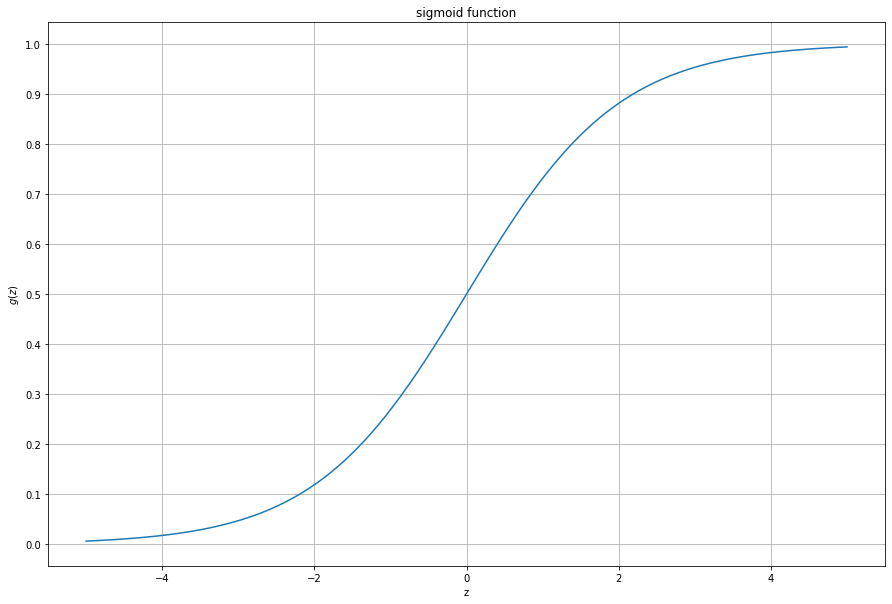

In [2]:
x = np.linspace(-5, 5, 100)
y = np.power(1 + np.exp(-x), -1)

plt.figure(figsize=(15, 10))
plt.plot(x, y)
plt.grid()
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.title("sigmoid function")
plt.xlabel("z")
plt.ylabel("$g(z)$")
plt.show()

Notice that $g(z)$ tends towards 1 as $z \to \infty$, and $g(z)$ tends towards $0$ as $z \to -\infty$

For classification, we can take a threshold, e.g. $0.5$, everything that is above the threshold, is positive, $y = 1$, while the other values mean $y = 0$.

## Logistic Regression: Titanic dataset

https://www.kaggle.com/c/titanic

Let's use Logistic Regression to predict who survives the Titanic.

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [4]:
!head -n5 datasets/titanic/train.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [5]:
train_df = pd.read_csv('datasets/titanic/train.csv')
test_df = pd.read_csv('datasets/titanic/test.csv')
dataset = pd.concat([train_df, test_df], sort=False)

print("train_df columns:", dataset.columns.values)
print("test_df columns:", dataset.columns.values)

train_df

train_df columns: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
test_df columns: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Each line from train/test dataset is a passenger, and each one has a number of features (12).

All features are described on the Kaggle challenge page, https://www.kaggle.com/c/titanic/data

In [7]:
print(dataset.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Notice the 'object' type of columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


### Data exploration and processing

Which features are categorical?

Which features are numerical?

Which features contain blank, null or empty values?

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
dataset.dropna(subset=['Survived'], inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null float64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


In [12]:
dataset.Sex = dataset.Sex.map({'male':0, 'female':1})
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [13]:
y = dataset.Survived.copy()
#X = dataset.drop(['Survived'], axis=1)
X = dataset
X.drop(['Name'], axis=1, inplace=True)
X.drop(['Ticket'], axis=1, inplace=True)
X.drop(['Cabin'], axis=1, inplace=True)
X.drop(['Embarked'], axis=1, inplace=True)

#X.drop(['Pclass'], axis=1, inplace=True)
X.drop(['Pclass'], axis=1, inplace=True)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null float64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(3), int64(4)
memory usage: 55.7 KB


In [15]:
X.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
0,1,0.0,0,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,1,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,0,35.0,0,0,8.0500


/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


[]

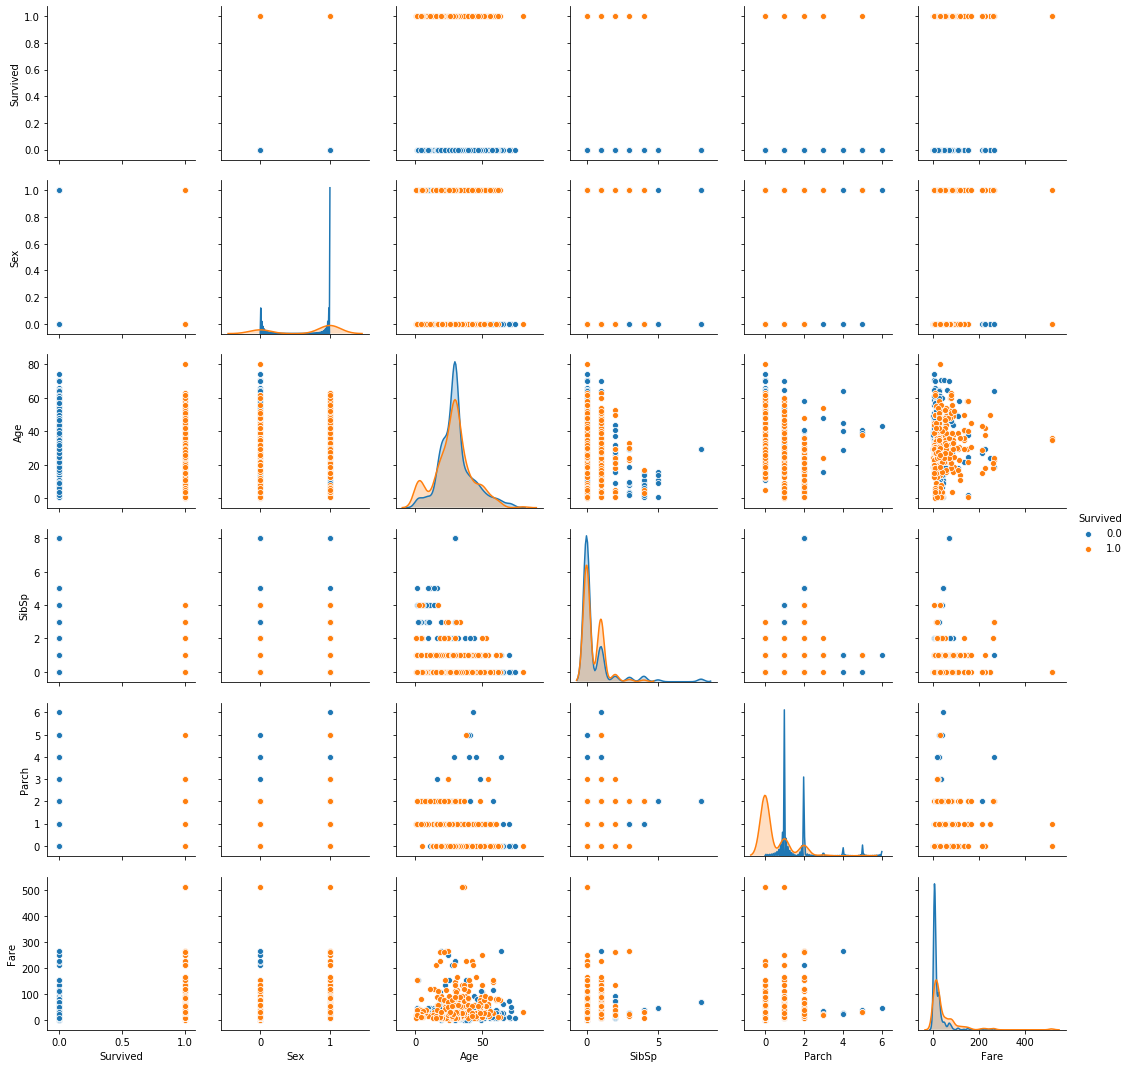

In [16]:
X.drop(['PassengerId'], axis=1, inplace=True)
X.Age.fillna(X.Age.mean(), inplace=True)
#X.Fare.fillna(X.Fare.mean(), inplace=True)

sns.pairplot(X, hue='Survived')
plt.plot()

[]

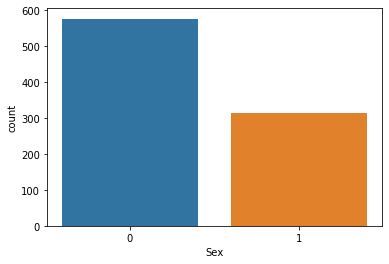

In [17]:
sns.countplot(x='Sex', data=X)
plt.plot()

[]

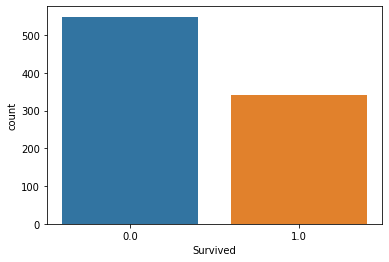

In [18]:
sns.countplot(x='Survived', data=X)
plt.plot()

In [19]:
X[X['Survived'] == 0.0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 6 columns):
Survived    549 non-null float64
Sex         549 non-null int64
Age         549 non-null float64
SibSp       549 non-null int64
Parch       549 non-null int64
Fare        549 non-null float64
dtypes: float64(3), int64(3)
memory usage: 30.0 KB


In [20]:
X[X['Survived'] == 1.0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 1 to 889
Data columns (total 6 columns):
Survived    342 non-null float64
Sex         342 non-null int64
Age         342 non-null float64
SibSp       342 non-null int64
Parch       342 non-null int64
Fare        342 non-null float64
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


Check for missing values.
Seems like all are in *Age* column and a single one for *Fare*

In [68]:
print("We have null values: ", X.isnull().values.any())
X.isnull().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [22]:
X.Age.fillna(X.Age.mean(), inplace=True)
X.Fare.fillna(X.Fare.mean(), inplace=True)

print("We have null values: ", X.isnull().values.any())
print(X.isnull().sum())

We have null values:  False
Survived    0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [24]:
print(X.shape)
print(X_train[:10])
print(X_train.shape)
print(X_valid.shape)

(891, 6)
     Survived  Sex        Age  SibSp  Parch      Fare
447       1.0    0  34.000000      0      0   26.5500
328       1.0    1  31.000000      1      1   20.5250
613       0.0    0  29.699118      0      0    7.7500
7         0.0    0   2.000000      3      1   21.0750
267       1.0    0  25.000000      1      0    7.7750
435       1.0    1  14.000000      1      2  120.0000
359       1.0    1  29.699118      0      0    7.8792
873       0.0    0  47.000000      0      0    9.0000
603       0.0    0  44.000000      0      0    8.0500
341       1.0    1  24.000000      3      2  263.0000
(623, 6)
(268, 6)


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
model.score(X_valid, y_valid)

1.0

# Naive Bayes

Intuition: Naive Bayes solves the classification problem by relying on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In other words, what is the probability of a label, given some features, $P(L~|~{\rm features})$

It's naive because it makes naive assumptions about the distribution of the data.

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we have only two possible labels (binary classification):
$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

But how to compute $P({\rm features}~|~L_i)$ ?

## Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution.
Imagine that you have the following data:

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

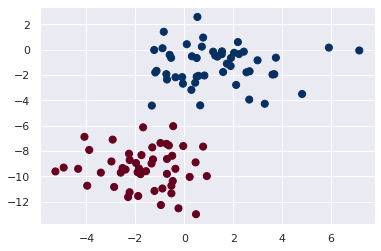

In [28]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.
This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.
The result of this naive Gaussian assumption is shown in the following figure:

![](figures/gaussian-naive-bayes-model.png)

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. 

This procedure is implemented in Scikit-Learn's `sklearn.naive_bayes.GaussianNB` estimator:

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Generate some data and predict the label

In [30]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is

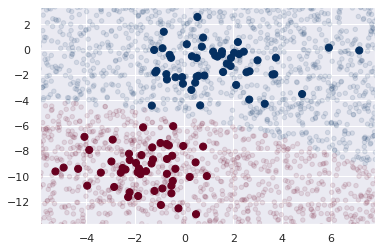

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

### When to use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:
* They are extremely fast for both training and prediction
* They provide straightforward probabilistic prediction
* They are often very easily interpretable
* They have very few (if any) tunable parameters
* These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:
* When the naive assumptions actually match the data (very rare in practice)
* For very well-separated categories, when model complexity is less important
* For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

# k Nearest Neighbors

k Nearest Neighbors is one of the simplest learning strategies.
Given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

A big disadvantage is that you need to store the entire *training* set (it's not actually training since you just keep the values around).

In [32]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()

In [33]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
X, y = iris.data, iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


Probabilistic predictions

In [35]:
# sepal length, sepal width, petal length, sepal width
knn.predict_proba([[3, 5, 4, 2],])

array([[0. , 0.8, 0.2]])

In [36]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [37]:
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features. We could
                        # avoid this ugly slicing by using a two-dim dataset
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.axis('tight')

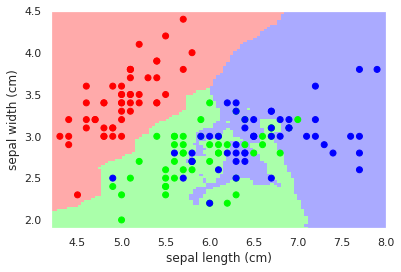

In [38]:
plot_iris_knn()

# k-means Clustering

Let's create some artificial data using `datasets.make_blobs` for illustration purposes.

In [39]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
X, y = datasets.make_blobs(centers=4, cluster_std=0.3, random_state=0)

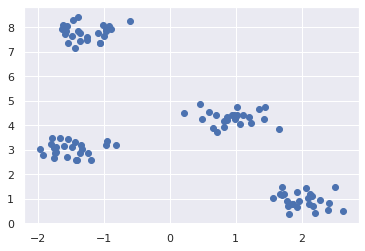

In [40]:
plt.scatter(X[:,0], X[:,1]);

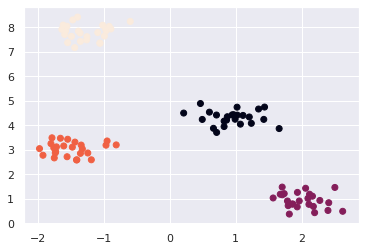

In [41]:
plt.scatter(X[:,0], X[:,1], c=y);

The K-means clustering algorithm associates each point $x_i$ in a set of input points $\{x_1, x_2, \ldots, x_m\}$ to $K$ clusters.
Each cluster is specified by a centroid that is the average location of all the points in the cluster.
The algorithm proceeds iteratively from arbitrary centroid locations, updating the membership of each point according to minimum distance, then updating the centroid location based on the new cluster membership.

The algorithm will have converged when the assignment of points to centroids does not change with each iteration.

Normally, you do not know the information in Y, however.

You could try to recover it from the data alone.

This is what the *K-Means algorithm* does.

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=8)
y_pred = kmeans.fit(X).labels_

Now the label assignments should be quite similar to $y$, but probably with a different color ordering.

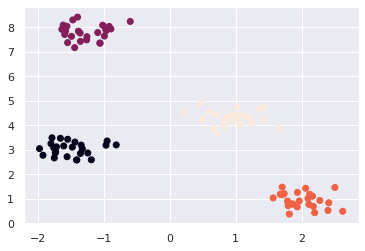

In [43]:
plt.scatter(X[:,0], X[:,1], c=y_pred);

[[-1.49837568  3.03745428]
 [-1.26017271  7.7924536 ]
 [ 2.01722843  0.93843189]
 [ 0.94597871  4.31636968]]


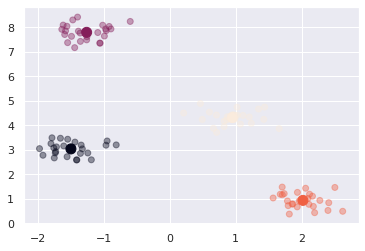

In [44]:
plt.scatter(X[:,0], X[:,1], c=y_pred, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(y_pred))
print(mu)

In [45]:
y

array([0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       2, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 1, 2, 0, 3, 1, 3, 2, 0, 2, 3, 2,
       2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 2, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 0])

In [46]:
kmeans.labels_

array([3, 1, 3, 3, 3, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 3, 1,
       0, 2, 3, 0, 0, 3, 2, 2, 2, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 0, 1, 0,
       0, 1, 2, 0, 3, 3, 3, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 1,
       0, 0, 2, 3, 1, 2, 3, 1, 3, 3, 0, 0, 2, 2, 2, 1, 0, 3, 2, 0, 2, 2,
       3, 3, 3, 0, 3, 0, 0, 1, 1, 0, 1, 3], dtype=int32)

Often, you're not so much interested in the assignments to the means.

You'll want to have a closer look at the means $\mu$.

The means in $\mu$ can be seen as representatives of their respective cluster.

# Principal Components Analysis (PCA)

Principal Component Analysis (PCA) is a dimension-reduction tool that can be used to reduce a large set of  variables to a small set that still contains most of the information in the large set.

It is a mathematical procedure that transforms a number of (possibly) correlated variables into a (smaller) number of uncorrelated variables called principal components.

The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible.

You can think of PCA as a lossy data compression method.
The goal is dimension reduction and there is no guarantee that the dimensions are interpretable.

Seeks a linear combination of variables such that the maximum variance is extracted from the variables.
It then removes this variance and seeks a second linear combination which explains the maximum proportion of the remaining variance, and so on.
This is called the principal axis method and results in orthogonal (uncorrelated) factors.
PCA analyzes total (common and unique) variance.

Related techniques:
* Eigenvectors
* Eigenvalues

Applications:
* Data compression
* Dimensionality reduction
* Noise filtering

## Simple datasets

Let's play with some datasets to illustrate what is happening.

First off, let's create a dataset with two dimensions.
The first dimension will have random numbers, while the second will be just a multiplication of the first dimenion, hence in practice could be dropped entirely since it carries no information.

In [47]:
import numpy as np

In [48]:
easy_example = True

In [49]:
# more complicated to convince you
# X = np.ones((100, 4), dtype=np.float)

if easy_example:
    X = np.ones((100, 2), dtype=np.float)
else:
    X = np.ones((100, 4), dtype=np.float)

In [50]:
# too easy to believe
# X[:, 0] = np.linspace(0, 100, 100)

if easy_example:
    X[:, 0] = np.random.randn(100, )
else:
    X[:, 0] = np.random.randn(100, )
    X[:, 1] = np.random.randn(100, )

In [51]:
if easy_example:
    X[:, 1] = X[:, 0] * 2
else:
    X[:, 2] = X[:, 0] * 2
    X[:, 3] = X[:, 1] * 2

In [52]:
print(X[:10])

[[-1.4002915  -2.800583  ]
 [-1.13102041 -2.26204082]
 [-1.59281949 -3.18563898]
 [-0.6319821  -1.26396421]
 [-1.64616248 -3.29232496]
 [-0.90857536 -1.81715072]
 [ 1.25730617  2.51461234]
 [-0.90657401 -1.81314801]
 [ 0.38639164  0.77278328]
 [-0.52090304 -1.04180607]]


In [53]:
from sklearn.decomposition import PCA
pca = PCA()

X_pca = pca.fit_transform(X)
print(pca.components_)
print(pca.mean_)

[[ 0.4472136   0.89442719]
 [ 0.89442719 -0.4472136 ]]
[0.05296057 0.10592114]


In [54]:
print(X_pca.shape)
print(X_pca[:10])

(100, 2)
[[-3.24957042e+00  3.40457967e-15]
 [-2.64746195e+00 -5.34148076e-17]
 [-3.68007610e+00  8.06770513e-17]
 [-1.53157838e+00 -9.90183931e-17]
 [-3.79935464e+00 -1.02436563e-16]
 [-2.15005970e+00 -1.87044534e-17]
 [ 2.69299863e+00  4.75015649e-17]
 [-2.14558454e+00 -1.18586949e-16]
 [ 7.45574538e-01  2.48352145e-18]
 [-1.28319803e+00 -3.19708777e-17]]


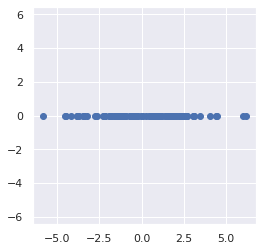

In [55]:
plt.figure(figsize=(4,4))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.axis('equal');

In [56]:
print("Covariance of X")
print(np.cov(X, rowvar=False))

print("Covariance of X_pca")
print(np.cov(X_pca, rowvar=False))

Covariance of X
[[1.06575282 2.13150564]
 [2.13150564 4.26301129]]
Covariance of X_pca
[[ 5.32876411e+00 -3.58573139e-32]
 [-3.58573139e-32  1.22144264e-31]]


In [57]:
import seaborn as sns
import pandas as pd

In [58]:
sns.set()
#sns.plotting_context

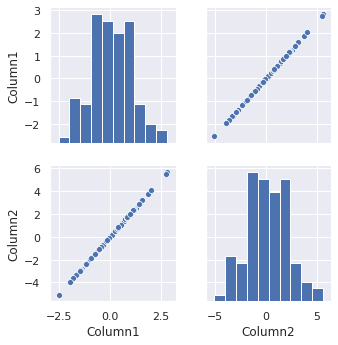

In [59]:
if easy_example:
    df = pd.DataFrame({'Column1': X[:, 0], 'Column2': X[:, 1]})
else:
    df = pd.DataFrame({'Column1': X[:, 0], 'Column2': X[:, 1], 'Column3': X[:, 2], 'Column4': X[:, 3]})

sns.pairplot(df)
plt.show()

## Higher dimensional datasets

Let's play with a more complicated dataset which has more than 2-4 dimensions (64 actually).

In [60]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

if False:
    from sklearn.datasets import load_digits

    # 8x8 images
    (data, target) = load_digits(return_X_y = True)
    X_digits = data
    Y_digits = target
else:
    from sklearn.datasets import fetch_openml

    # 28x28
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
    X_digits = X
    Y_digits = y

# shuffle the dataset since it is ordered
X_digits, Y_digits = shuffle(X_digits, Y_digits)
# we're taking only a subset to not stress the CPU too much
X_digits = X_digits[-5000:]

print(X_digits.shape)
print(Y_digits.shape)

(5000, 784)
(70000,)


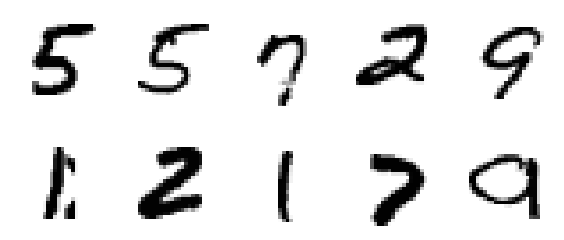

In [61]:
plt.rc("image", cmap="binary")
plt.figure(figsize=(8,4))

img_dim = int(np.sqrt(X_digits.shape[1]))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_digits[i].reshape(img_dim, img_dim))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

In [62]:
print(X_digits.shape)

(5000, 784)


In [63]:
from sklearn.decomposition import PCA
pca = PCA()
X2_digits = pca.fit_transform(X_digits)

In [64]:
print(X_digits.shape)
print(X2_digits.shape)

(5000, 784)
(5000, 784)


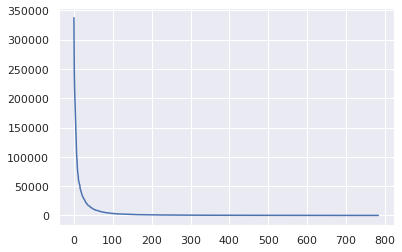

In [65]:
plt.plot(pca.explained_variance_);

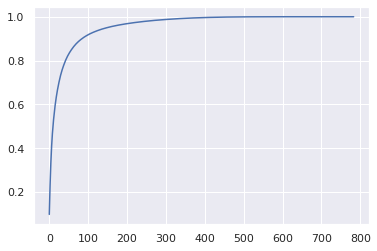

In [66]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(b=True)
#plt.yticks(np.linspace(0, 1.1, 0.1))
#plt.xlim([0, 100])

Remember the original shape: (5000, 784)
PCA transformed samples: (5000, 100)
PCA reconstructed samples: (5000, 784)


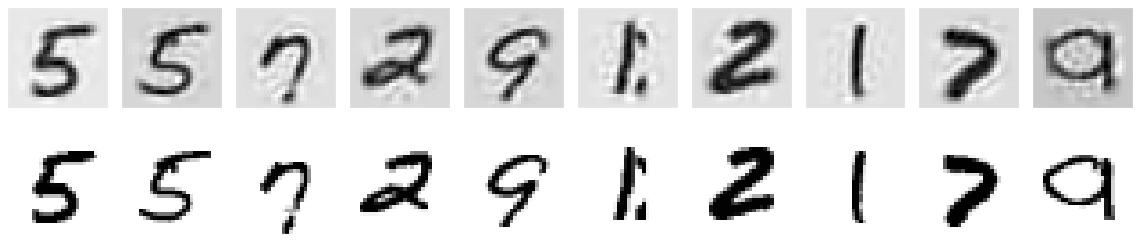

In [67]:
dims_to_keep = 100
pca = PCA(n_components=dims_to_keep)
X2_few_digits = pca.fit_transform(X_digits)

print("Remember the original shape: {}".format(X_digits.shape))
print("PCA transformed samples: {}".format(X2_few_digits.shape))

plt.figure(figsize=(16,4))

X_recons_digits = pca.inverse_transform(X2_few_digits)
print("PCA reconstructed samples: {}".format(X_recons_digits.shape))

for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_recons_digits[i].reshape(img_dim, img_dim))
    plt.xticks(())
    plt.yticks(())

for i in range(10):
    plt.subplot(2,10,11+i)
    plt.imshow(X_digits[i].reshape(img_dim, img_dim))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

# Singular Value Decomposition (SVD)

Singular Value Decomposition is a matrix decomposition method for reducing a matrix to its constituent parts and a popular application is dimensionality reduction.

## Intuition

The intuition is that data with a large number of features can be reduced to a smaller subset of features that are *most* relevant to the prediction/classification problem that we're dealing with.

https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254


# Decision Trees

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.
For example, if you wanted to build a decision tree to classify an animal, you could do the following:

![](figures/decision-tree.png)

The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes.

Decision Trees end up overfitting the data but we can do better if we combine multiple Decision Trees and average their results.

## Random Forests

A Random Forest is an ensemble of Decision Trees.

# Summary

* Logistic Regression
  * Who survives the Titanic?
* Naive Bayes
  * Gaussian Naive Bayes
* k Nearest Neighbors
* k-means Clustering
* Principal Components Analysis (PCA)
* Other techniques:
  * Singular Value Decomposition
  * Decision Trees
  * Random Forests

# References

* https://github.com/jakevdp/PythonDataScienceHandbook
* https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter08_ml/02_titanic.ipynb
* https://github.com/ipython-books/cookbook-2nd/blob/master/chapter08_ml/02_titanic.md
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://datascienceplus.com/logistic-regression-with-python-using-titanic-data/
* https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python
* https://mashimo.wordpress.com/2018/03/31/logistic-regression-using-sklearn/